In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score  
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, silhouette_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing numerical data
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Handle missing categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [5]:
binary_encoder = LabelEncoder()
binary_categorical_cols = ['Ever_Married', 'Graduated', 'Var_1']
for col in binary_categorical_cols:
    df[col] = binary_encoder.fit_transform(df[col])

In [6]:
df = pd.get_dummies(df, columns=['Gender', 'Profession'], drop_first=True)


In [7]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

         ID  Ever_Married       Age  Graduated  Work_Experience  \
0 -0.258250             0 -1.284623          0        -0.508763   
1 -0.322213             1 -0.327151          1         0.000000   
2  1.092695             1  1.408268          1        -0.508763   
3 -0.672087             1  1.408268          1        -0.818671   
4 -0.312195             1 -0.207467          1         0.000000   

  Spending_Score  Family_Size  Var_1 Segmentation  Gender_Male  \
0            Low     0.767001      3            D            1   
1        Average     0.099972      3            A            0   
2            Low    -1.234085      5            B            0   
3           High    -0.567056      5            B            1   
4           High     2.101059      5            A            0   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0                  0                    0                         0   
1                  0                    1                 

In [8]:
df.describe()

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,8.068000e+03,8068.000000,8.068000e+03,8068.000000,8.068000e+03,8.068000e+03,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,-2.318863e-15,0.592836,6.340986e-17,0.625434,-7.045540e-17,-1.981558e-17,4.147372,0.547471,0.085275,0.086639,0.117625,0.074244,0.165097,0.030491,0.077219,0.036192
std,1.000062e+00,0.491336,1.000062e+00,0.484041,1.000062e+00,1.000062e+00,1.419453,0.497772,0.279308,0.281322,0.322184,0.262184,0.371291,0.171944,0.266955,0.186780
min,-1.732883e+00,0.000000,-1.523992e+00,0.000000,-8.186706e-01,-1.234085e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.625335e-01,0.000000,-8.058871e-01,0.000000,-8.186706e-01,-5.670565e-01,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.587276e-03,1.000000,-2.074667e-01,1.000000,-5.087633e-01,0.000000e+00,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.727719e-01,1.000000,5.704798e-01,1.000000,4.209584e-01,7.670012e-01,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.731947e+00,1.000000,2.724793e+00,1.000000,3.520031e+00,4.102145e+00,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


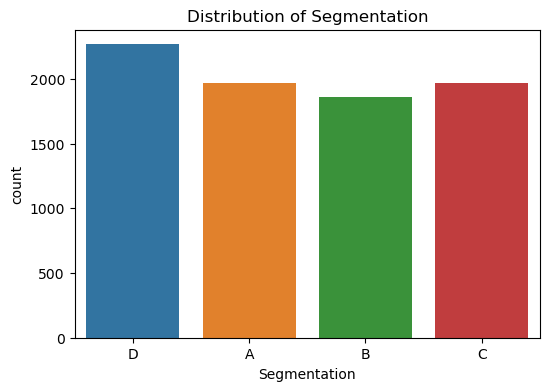

In [9]:
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Segmentation', data=df)
plt.title('Distribution of Segmentation')
plt.show()

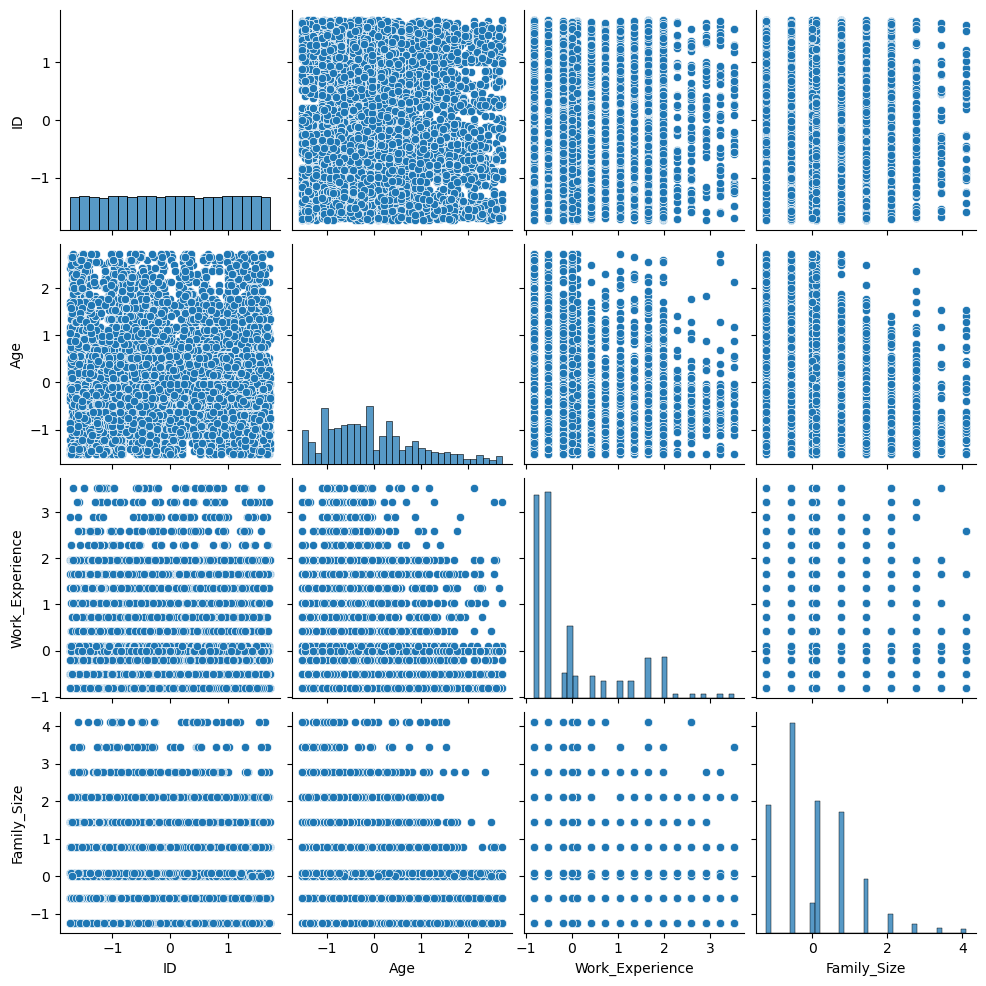

In [10]:
# Explore Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numerical_cols])
plt.show()

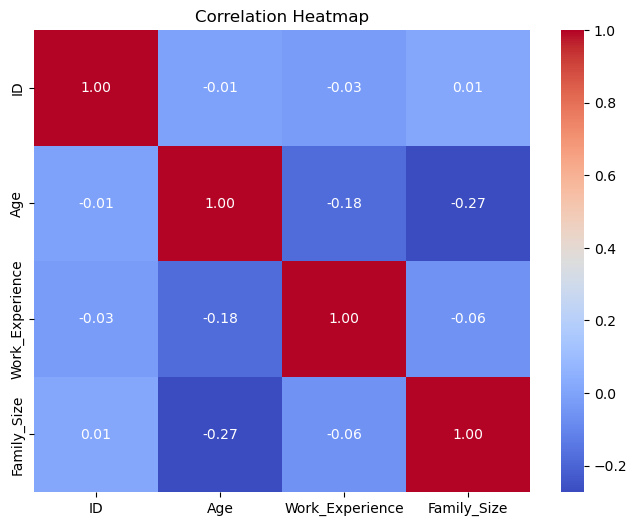

In [11]:
# Correlation Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Explore Categorical Variables
categorical_cols = df.select_dtypes(include=['int64', 'float64']).columns

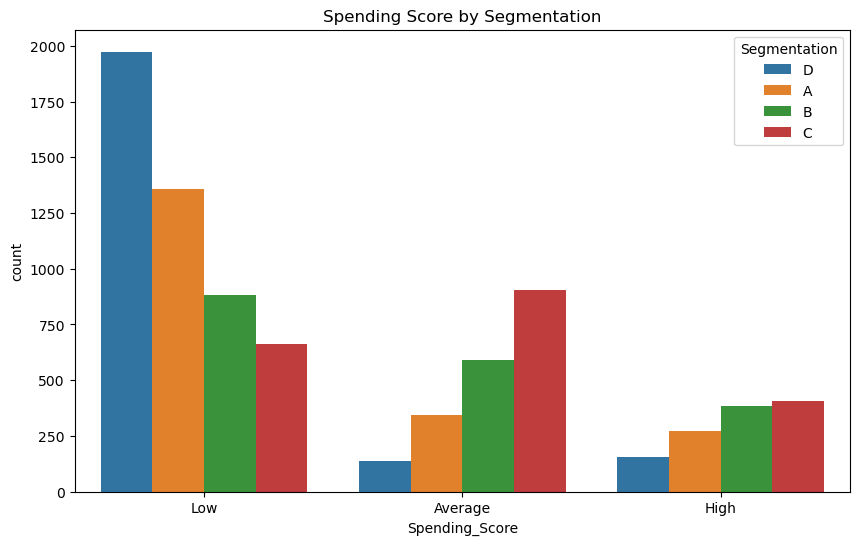

In [13]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Spending_Score', data=df, hue='Segmentation')
plt.title('Spending Score by Segmentation')
plt.show()

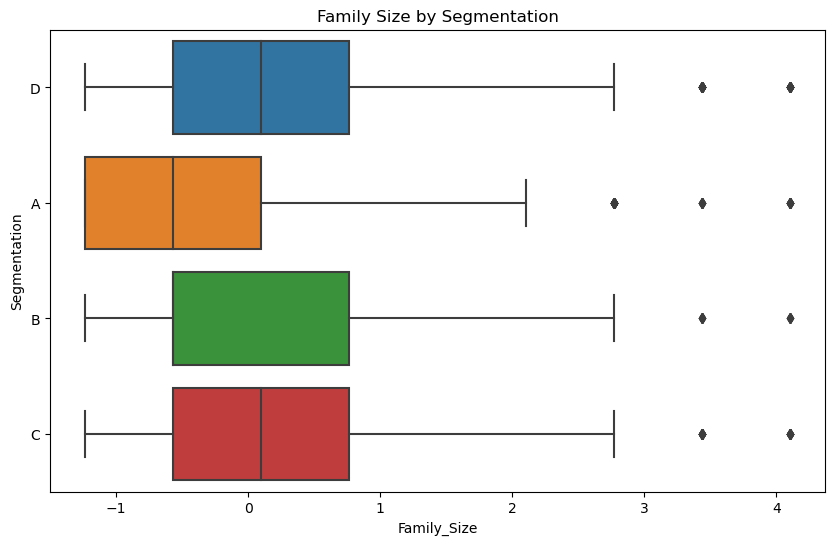

In [14]:
# Boxplots for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family_Size', y='Segmentation', data=df)
plt.title('Family Size by Segmentation')
plt.show()

In [15]:
label_encoder = LabelEncoder()
df['Spending_Score'] = label_encoder.fit_transform(df['Spending_Score'])

if 'Gender' in df.columns:  # Check if the 'Gender' column exists
    categorical_cols = ['Gender']
    df = pd.get_dummies(df, columns=categorical_cols)

X = df.drop(columns=['Segmentation'])
y = df['Segmentation']


clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [16]:
importance = clf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


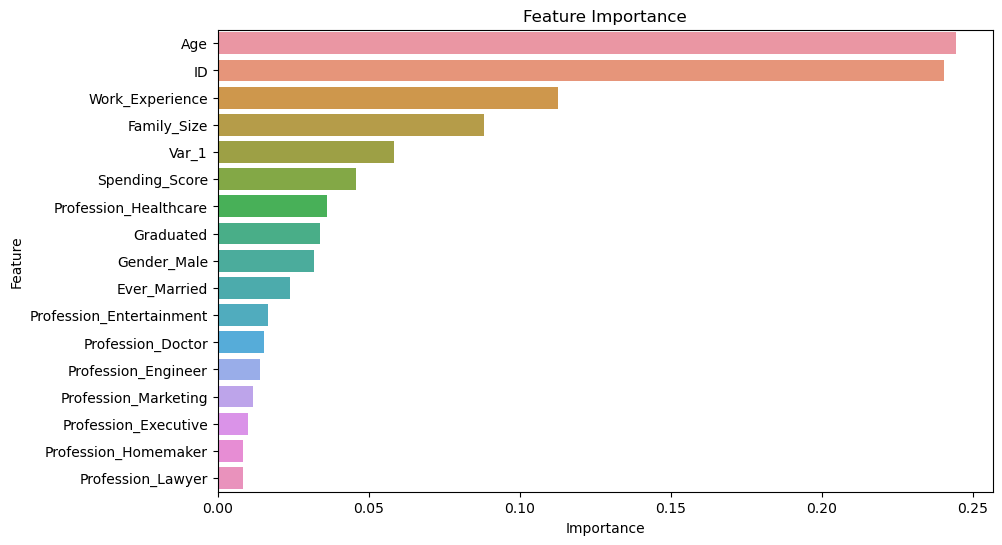

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [18]:
features = ['ID','Age','Work_Experience', 'Family_Size','Var_1']


In [19]:
X = df[features]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

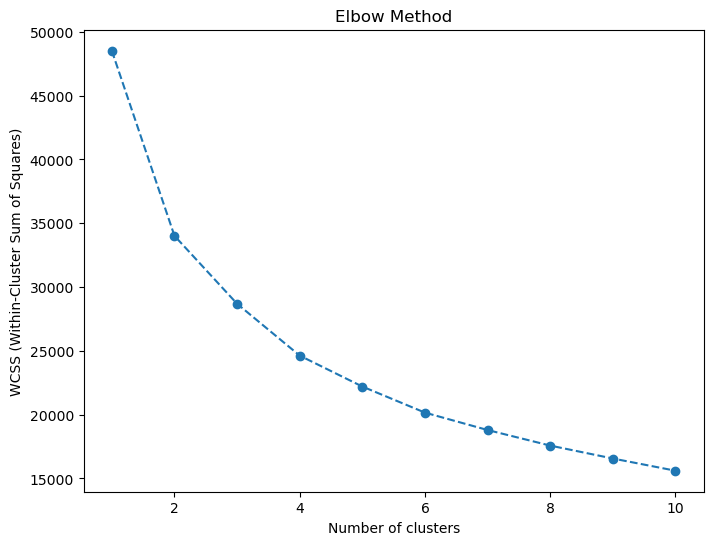

In [20]:
# Plot the Elbow Method to identify the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [21]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=3, n_init=10, random_state=0)

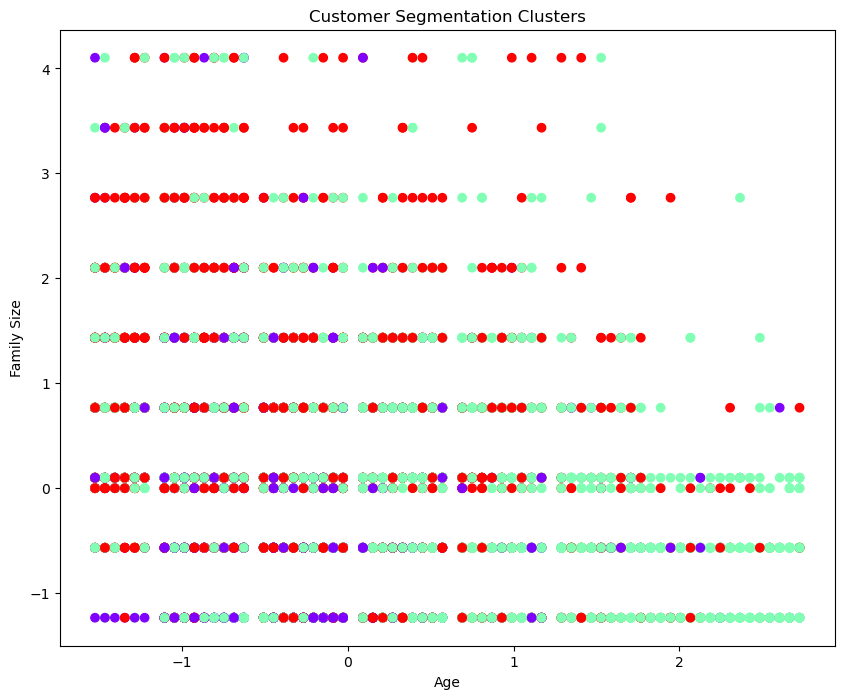

In [22]:
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Age'], X['Family_Size'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Customer Segmentation Clusters')
plt.show()

In [23]:
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

               ID       Age  Work_Experience  Family_Size     Var_1
Cluster                                                            
0       -0.001330 -0.335762         1.777850    -0.209615  4.835646
1       -0.010913  0.252647        -0.479489    -0.088038  5.021374
2        0.020999 -0.272406        -0.148050     0.285356  2.126491


In [24]:
cluster_range = range(2, 11)  

# Initialize lists to store silhouette scores for each cluster number
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


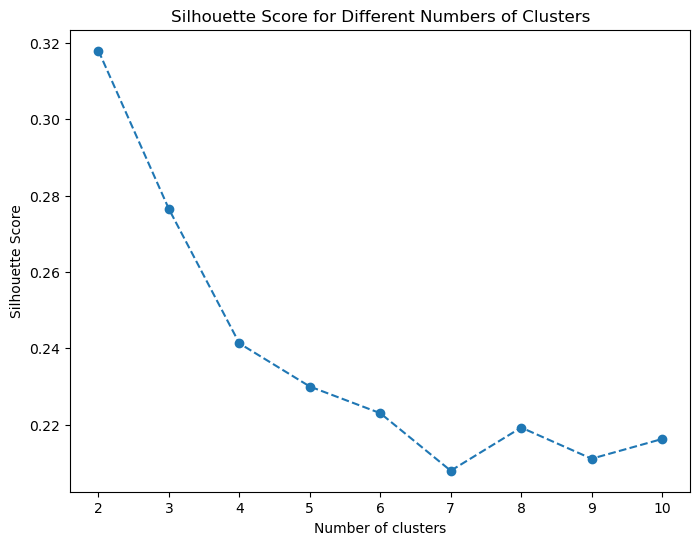

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [26]:
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

Optimal number of clusters: 2
               ID       Age  Work_Experience  Family_Size     Var_1
Cluster                                                            
0       -0.014755  0.121488         0.019159     -0.11801  5.022341
1        0.033383 -0.274859        -0.043347      0.26699  2.167812


In [27]:
X = df[features]  # Features
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9993804213135068


In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  

print(f'Model Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model Accuracy: 0.9993804213135068
Precision: 0.9993816579975118
Recall: 0.9993804213135068
F1 Score: 0.9993805916872438
